In [1]:
# import the libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file
complete_data = pd.read_csv('HR-Employee-Attrition.csv', low_memory=False)
complete_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check for data types
complete_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
# Check for the number of the values (to see if we have missing value)
complete_data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [5]:
# Dropping unwanted columns
cleaned_data = complete_data.drop(columns=[ 'BusinessTravel', 'EmployeeCount', 'DistanceFromHome',
                                             'Attrition','Over18', 'StockOptionLevel', 'StandardHours'])



cleaned_data.head()

,Age,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,Sales,2,Life Sciences,1,2,Female,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,279,Research & Development,1,Life Sciences,2,3,Male,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1373,Research & Development,2,Other,4,4,Male,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,1392,Research & Development,4,Life Sciences,5,4,Female,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,591,Research & Development,1,Medical,7,1,Male,40,3,...,12,3,4,6,3,3,2,2,2,2


In [6]:
# selecting numeric columns to crate a summary statistic table
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns
# Getting the mean, median, var, std, sem for each column
summary_table = cleaned_data[numeric_cols].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,Age,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.923810,802.485714,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6.502931e+03,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
median,36.000000,802.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4.919000e+03,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
var,83.455049,162819.593737,1.048914,362433.299749,1.194829,413.285626,0.506319,1.225316,1.216270,2.216486e+07,...,13.395144,0.130194,1.169013,60.540563,1.662219,0.499108,37.534310,13.127122,10.384057,12.731595
std,9.135373,403.509100,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4.707957e+03,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
sem,0.238269,10.524335,0.026712,15.702015,0.028510,0.530233,0.018559,0.028871,0.028764,1.227931e+02,...,0.095459,0.009411,0.028200,0.202939,0.033627,0.018426,0.159792,0.094499,0.084048,0.093064


In [7]:
# Check the values of Department column
cleaned_data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [8]:
# Check the value for MaritalStatus column
cleaned_data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [9]:
# Check the value for EducationField column
cleaned_data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [10]:
cleaned_data.head()


,Age,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,Sales,2,Life Sciences,1,2,Female,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,279,Research & Development,1,Life Sciences,2,3,Male,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1373,Research & Development,2,Other,4,4,Male,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,1392,Research & Development,4,Life Sciences,5,4,Female,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,591,Research & Development,1,Medical,7,1,Male,40,3,...,12,3,4,6,3,3,2,2,2,2


In [11]:
# Group the data by 'Marital_Status'
grouped_data = pd.DataFrame(cleaned_data['MaritalStatus']).value_counts()


# This will calculate mean income for grouped_data
mean_income_by_marital_status = cleaned_data.groupby(cleaned_data['MaritalStatus'])['MonthlyIncome'].mean()
mean_income_by_marital_status


MaritalStatus
Divorced    6786.287462
Married     6793.671620
Single      5889.472340
Name: MonthlyIncome, dtype: float64

In [12]:
marital_status = pd.DataFrame(cleaned_data['MaritalStatus']).value_counts()
marital_status

MaritalStatus
Married          673
Single           470
Divorced         327
Name: count, dtype: int64

In [13]:
status = pd.DataFrame(cleaned_data['MaritalStatus']).value_counts()
status

MaritalStatus
Married          673
Single           470
Divorced         327
Name: count, dtype: int64

In [14]:
# Calculate descriptive statistics mean std min interQuartile for income distribution by marital status
income_stats_by_marital_status = cleaned_data.groupby('MaritalStatus')['MonthlyIncome'].describe()

income_stats_by_marital_status

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Divorced,327.0,6786.287462,4845.647590,1129.0,3015.0,5131.0,9417.50,19973.0
Married,673.0,6793.671620,4859.686276,1052.0,3022.0,5204.0,9069.00,19999.0
Single,470.0,5889.472340,4325.571133,1009.0,2722.0,4536.0,7328.25,19926.0


In [15]:
# To calculate average age of the groups
average_age_by_marital_status = cleaned_data.groupby('MaritalStatus')['Age'].mean().round()

# Print the average age for married and single individuals
print("Average age for married individuals:", average_age_by_marital_status['Married'])
print("Average age for single individuals:", average_age_by_marital_status['Single'])


Average age for married individuals: 38.0
Average age for single individuals: 35.0


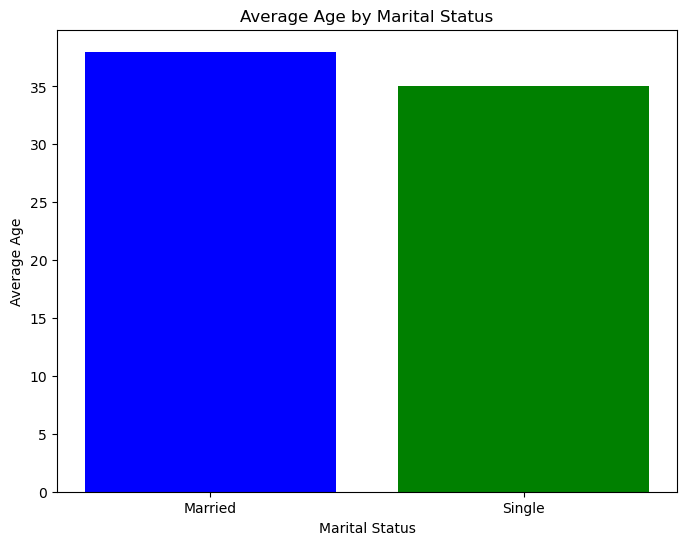

In [16]:
#Graph for Married vs Single Individduals

# Data
marital_status = ['Married', 'Single']
average_age = [average_age_by_marital_status['Married'], average_age_by_marital_status['Single']]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(marital_status, average_age, color=['blue', 'green'])
plt.title('Average Age by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Age')
plt.show()


<Figure size 1000x600 with 0 Axes>

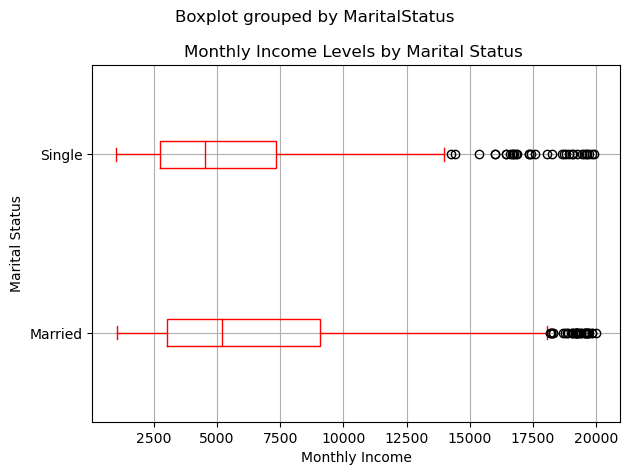

In [17]:
#Getting median salaries for Married vs Single 

# Filter out rows where marital status is not 'Divorced'
cleaned_data_filtered = cleaned_data[cleaned_data['MaritalStatus'] != 'Divorced']

# Create a box plot to compare monthly income levels by marital status
plt.figure(figsize=(10, 6))
cleaned_data_filtered.boxplot(column='MonthlyIncome', by='MaritalStatus', vert=False, color ='red')
plt.title('Monthly Income Levels by Marital Status ')
plt.xlabel('Monthly Income')
plt.ylabel('Marital Status')
plt.tight_layout()
plt.show()



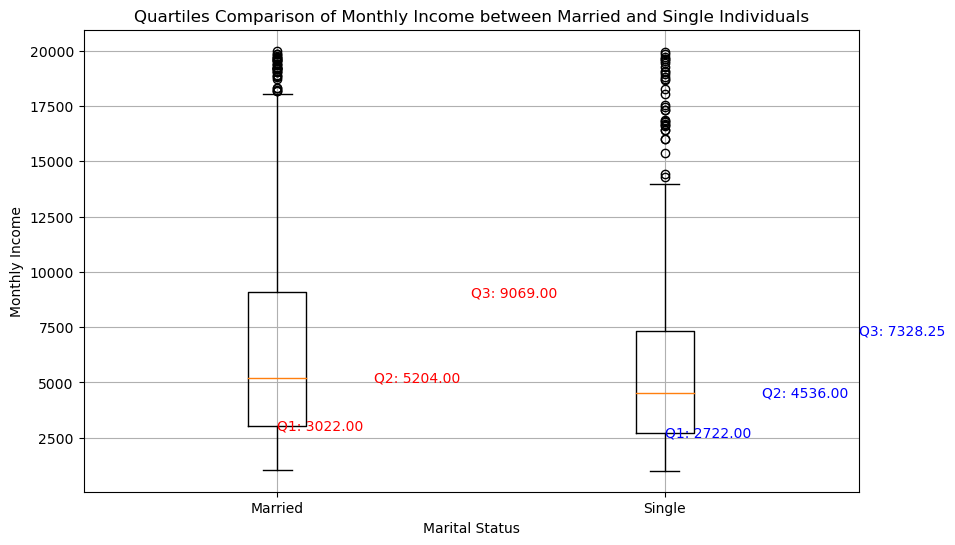

In [18]:
# Quartile Comparisions 
# Filter data for married and single individuals
married_income = cleaned_data[cleaned_data['MaritalStatus'] == 'Married']['MonthlyIncome']
single_income = cleaned_data[cleaned_data['MaritalStatus'] == 'Single']['MonthlyIncome']

# Calculate quartiles for MonthlyIncome in each group
married_quartiles = married_income.quantile([0.25, 0.5, 0.75])
single_quartiles = single_income.quantile([0.25, 0.5, 0.75])

# Create box plots for MonthlyIncome in married and single individuals
plt.figure(figsize=(10, 6))
plt.boxplot([married_income, single_income], labels=['Married', 'Single'])

# Add quartile annotations for married individuals
for i, quartile in enumerate(married_quartiles):
    plt.text(1 + i * 0.25, quartile, f'Q{i+1}: {quartile:.2f}', fontsize=10, va='center', ha='left', color='red')

# Add quartile annotations for single individuals
for i, quartile in enumerate(single_quartiles):
    plt.text(2 + i * 0.25, quartile, f'Q{i+1}: {quartile:.2f}', fontsize=10, va='center', ha='left', color='blue')

# Add title and labels
plt.title('Quartiles Comparison of Monthly Income between Married and Single Individuals')
plt.xlabel('Marital Status')
plt.ylabel('Monthly Income')

plt.grid(True)
plt.show()

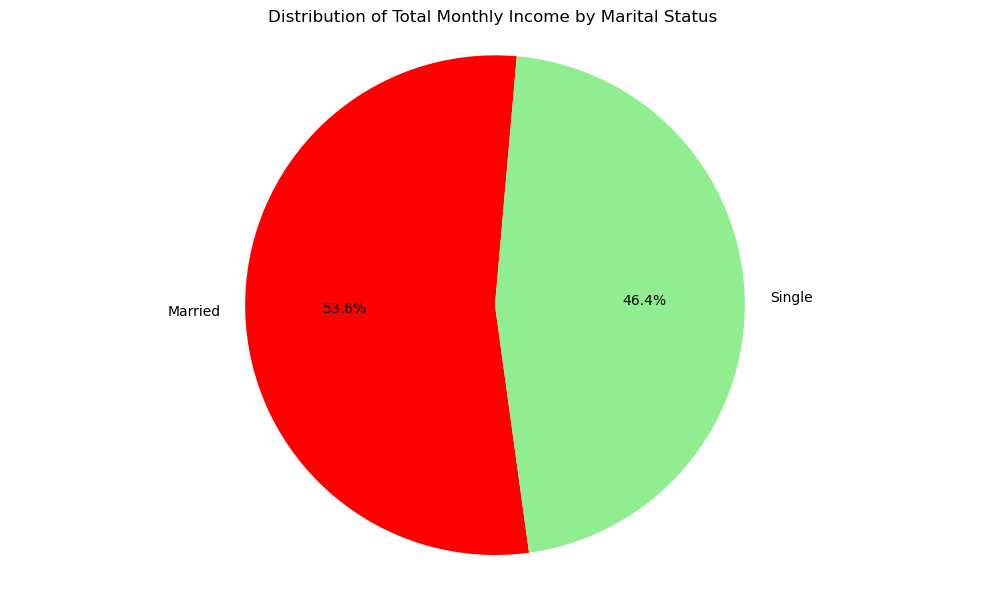

In [19]:
# Filter out rows where marital status is not 'Divorced'
cleaned_data_filtered = cleaned_data[cleaned_data['MaritalStatus'] != 'Divorced']

# Calculating the total monthly inome for married vs signle 
total_monthly_income_by_marital_status = cleaned_data_filtered.groupby('MaritalStatus')['MonthlyIncome'].mean()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(total_monthly_income_by_marital_status, labels=total_monthly_income_by_marital_status.index, autopct='%1.1f%%', colors=['red', 'lightgreen'], startangle=85)
plt.title('Distribution of Total Monthly Income by Marital Status ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


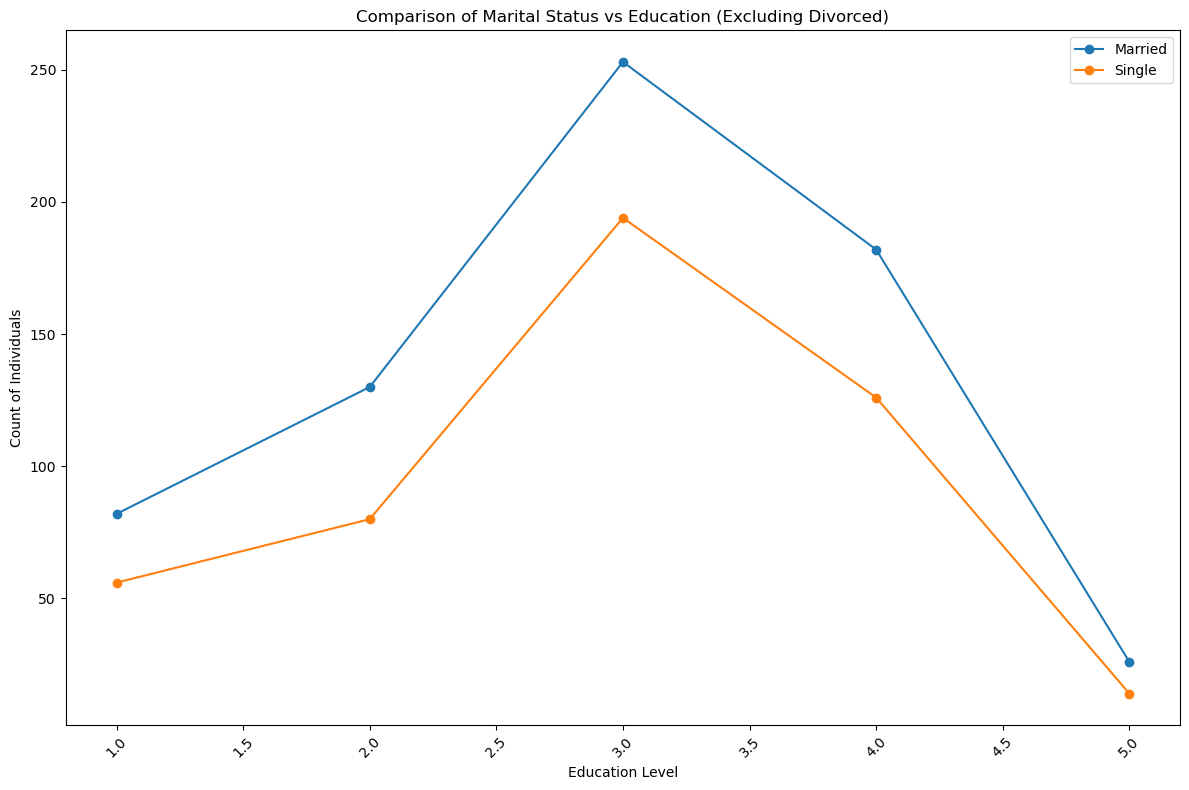

In [20]:
#Marital vs Education chart
# Filter out individuals with 'Divorced' marital status
data_filtered = cleaned_data[cleaned_data['MaritalStatus'] != 'Divorced']

# Group by MaritalStatus and Education, and calculate the count of individuals
marital_education_count = data_filtered.groupby(['MaritalStatus', 'Education']).size().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Plot count of individuals for each marital status using a line graph
for marital_status in marital_education_count.index:
    plt.plot(marital_education_count.columns, marital_education_count.loc[marital_status], marker='o', label=marital_status)

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count of Individuals')
plt.title('Comparison of Marital Status vs Education (Excluding Divorced)')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


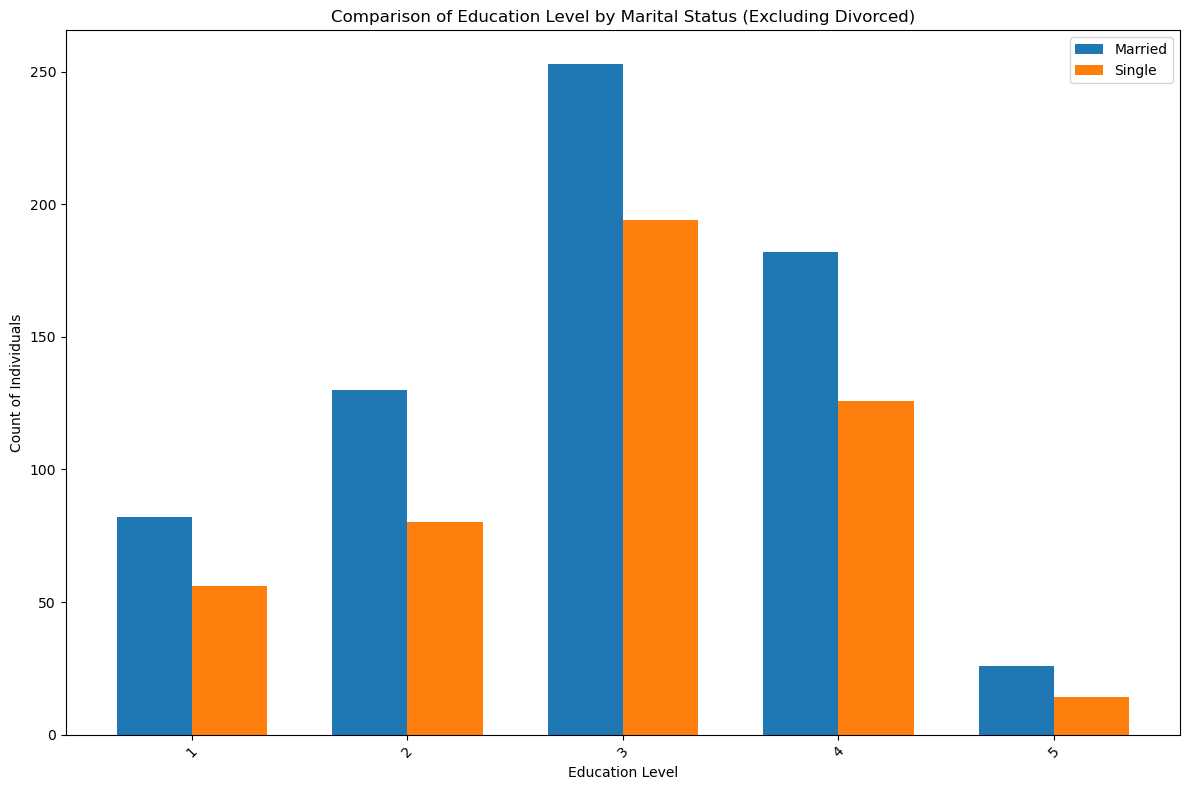

In [21]:
#Education section 
# Filter out individuals with 'Divorced' marital status
data_filtered = cleaned_data[cleaned_data['MaritalStatus'] != 'Divorced']

# Group by MaritalStatus and Education, and calculate the count of individuals
marital_education_count = data_filtered.groupby(['MaritalStatus', 'Education']).size().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Get the number of education levels
num_education_levels = len(marital_education_count.columns)

# Define the width of each bar
bar_width = 0.35

# Define the positions for the bars
positions = range(num_education_levels)

# Plot a grouped bar graph for each marital status
for i, marital_status in enumerate(marital_education_count.index):
    plt.bar([p + i * bar_width for p in positions], marital_education_count.loc[marital_status], bar_width, label=marital_status)

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count of Individuals')
plt.title('Comparison of Education Level by Marital Status (Excluding Divorced)')
plt.xticks([p + (num_education_levels - 4) * bar_width / 2 for p in positions], marital_education_count.columns, rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

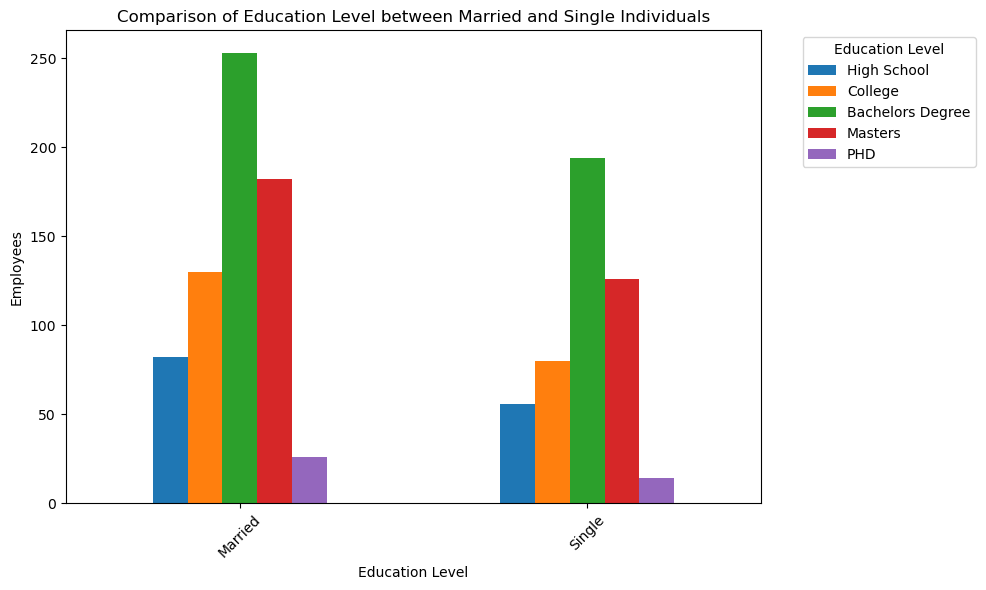

In [22]:
#eduction level 
ax = marital_education_count.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Education Level between Married and Single Individuals')
plt.xlabel('Education Level')
plt.ylabel('Employees')
plt.xticks(rotation=45)

# Add legend with custom labels
ax.legend(title='Education Level', labels=['High School','College', 'Bachelors Degree', 'Masters', 'PHD'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

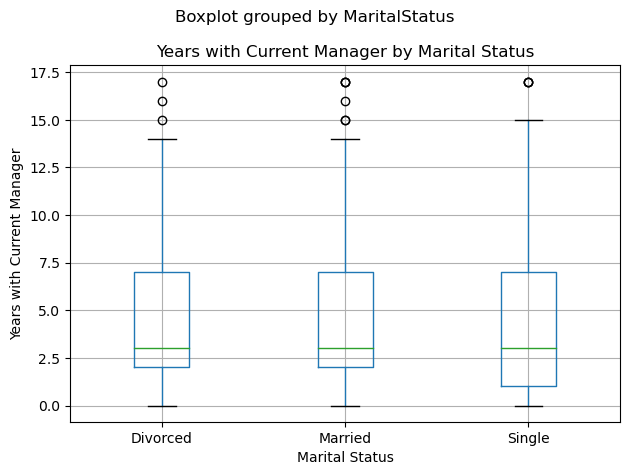

In [23]:
#Manager Section 
#box plot to compare years with current manager by marital status

cleaned_data.boxplot(column='YearsWithCurrManager', by='MaritalStatus')
plt.title('Years with Current Manager by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Years with Current Manager')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


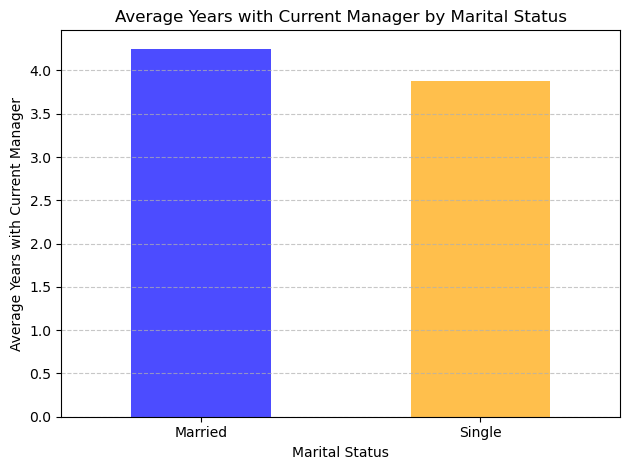

In [24]:
# Filter the data to exclude "Divorced" marital status
filtered_data = cleaned_data[cleaned_data['MaritalStatus'] != 'Divorced']

# Group the filtered data by MaritalStatus and calculate the mean YearsWithCurrManager for each group
mean_years_with_curr_manager = filtered_data.groupby('MaritalStatus')['YearsWithCurrManager'].mean()

# Plot bar graph
mean_years_with_curr_manager.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)

#labels and title
plt.title('Average Years with Current Manager by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Years with Current Manager')

# Show plot
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()
